In [1]:
import networkx as nx
import math
from matplotlib import pyplot as plt

def display_graph(T):
    pos=nx.spring_layout(T)

    nx.draw(T, nodecolor='r', edge_color='b', pos=pos)
    labels = nx.get_edge_attributes(T,'weight')
    nx.draw_networkx_edge_labels(T,pos,edge_labels=labels)
    nx.draw_networkx_labels(T,pos)
    plt.savefig('graph.png')
    plt.show()

In [2]:
G = nx.Graph()

G.add_edge(1,2, weight=.5)
G.add_edge(2,3, weight=1)
G.add_edge(3,4, weight=3)
G.add_edge(4,1, weight=1)
G.add_edge(5,2, weight=3)
G.add_edge(5,3, weight=4)
G.add_edge(7,1, weight=2)
G.add_edge(3,1, weight=1)
G.add_edge(8,2, weight=2)
G.add_edge(8, 3, weight=.1)
G.add_edge(9, 5, weight=.6)
G.add_edge(6, 4, weight=1)

[(1, 2), (1, 4), (1, 7), (1, 3), (2, 3), (2, 5), (2, 8), (3, 4), (3, 5), (3, 8), (4, 6), (5, 9)]
{2: {'weight': 0.5}, 4: {'weight': 1}, 7: {'weight': 2}, 3: {'weight': 1}}


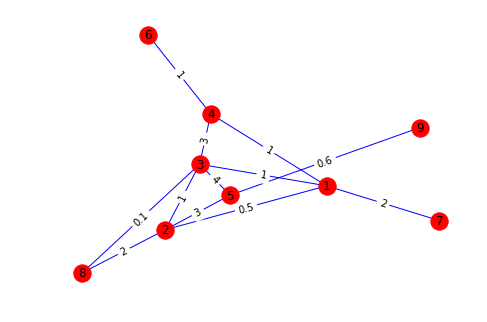

In [3]:
print(G.edges)
print(G[1])
display_graph(G)

In [3]:
#Graph Traversal (Depth-first)
def depth_traverse(G, first_node = None):
    #Initialize the visited flag to false for all nodes
    for node in G:
        G.nodes[node]['visited'] = False
    
    #If the starting point is not specified,
    #default to the "first" node in the dict
    if first_node is None:
        first_node = list(G)[0]
        
    #initialize stack and push first node
    #into it
    node_stack = []
    G.nodes[first_node]['visited'] = True
    node_stack.append(first_node)

    #process nodes on the stack
    while node_stack:
        #get node from stack
        node = node_stack.pop()
    
        #get adjacent nodes, and process them
        #if not already visited
        for adj_nd in G[node]:
            if G.nodes[adj_nd]['visited']:
                continue
        
            print('{}\t--->\t{}'.format(node, adj_nd))
            #mark visited and push to stack so that its
            #adjacent nodes can be processed.
            G.nodes[adj_nd]['visited'] = True
            node_stack.append(adj_nd)
    
depth_traverse(G, 1)

1	--->	2
1	--->	4
1	--->	7
1	--->	3
3	--->	5
3	--->	8
5	--->	9
4	--->	6


In [4]:
#Graph Traversal (Breadth-first)
from queue import Queue
def breadth_traverse(G, first_node = None):
    #Initialize the visited flag to false for all nodes
    for node in G:
        G.nodes[node]['visited'] = False
    
    #If the starting point is not specified,
    #default to the "first" node in the dict
    if first_node is None:
        first_node = list(G)[0]
        
    #initialize queue and push first node
    #into it
    node_queue = Queue()
    G.nodes[first_node]['visited'] = True
    node_queue.put(first_node)

    #process nodes on the queue
    while not node_queue.empty():
        #get node from queue
        node = node_queue.get()
    
        #get adjacent nodes, and process them
        #if not already visited
        for adj_nd in G[node]:
            if G.nodes[adj_nd]['visited']:
                continue
        
            print('{}\t--->\t{}'.format(node, adj_nd))
            #mark visited and push to queue so that its
            #adjacent nodes can be processed.
            G.nodes[adj_nd]['visited'] = True
            node_queue.put(adj_nd)

breadth_traverse(G)

1	--->	2
1	--->	4
1	--->	7
1	--->	3
2	--->	5
2	--->	8
4	--->	6
5	--->	9


In [7]:
for node in G:
    print('{}\t{}'.format(node, G[node]))
    for adj_nd in G[node]:
        print('\t{}\t{}'.format(adj_nd, G[node][adj_nd]['weight']))

1	{2: {'weight': 0.5}, 4: {'weight': 1}, 7: {'weight': 2}, 3: {'weight': 1}}
	2	0.5
	4	1
	7	2
	3	1
2	{1: {'weight': 0.5}, 3: {'weight': 1}, 5: {'weight': 3}, 8: {'weight': 2}}
	1	0.5
	3	1
	5	3
	8	2
3	{2: {'weight': 1}, 4: {'weight': 3}, 5: {'weight': 4}, 1: {'weight': 1}}
	2	1
	4	3
	5	4
	1	1
4	{3: {'weight': 3}, 1: {'weight': 1}}
	3	3
	1	1
5	{2: {'weight': 3}, 3: {'weight': 4}}
	2	3
	3	4
7	{1: {'weight': 2}}
	1	2
8	{2: {'weight': 2}}
	2	2


In [57]:
for adj_node in G[1]:
    print(adj_node)
    print(G[1][adj_node])

2
{'weight': 0.5}
4
{'weight': 1}
7
{'weight': 2}
3
{'weight': 1}


In [114]:
def prim(G, root_nd = None, verbose=False):
    #Initialize empty tree
    T = nx.Graph()
    
    #Define "infinity". This is used as the distance between
    #unconnected nodes, and should be larger than the largest
    #weight in the graph.
    infty = 1000

    #Initialize the min_weight and best_edge values
    #for each node.
    for node in G.nodes:
        G.nodes[node]['min_weight'] = infty
        G.nodes[node]['best_edge'] = None
        
    #Create the list of nodes to be added to the 
    #tree, and set the min_weight of the designated
    #"root" node to 0, so it is the first selected.
    Q = list(G.nodes)
    if root_nd is None:
        root_nd = Q[0]
        
    G.nodes[root_nd]['min_weight'] = 0
    
    #Iterate over Q until it is empty.
    #NOTE: This will result in an infinite loop
    #in the case of a graph that is not fully connected
    while Q:
        #Find the node to add to the tree based on
        #the min_weight parameter. Save the index
        #so we can delete it later.
        temp_min = infty
        best_node = None
        best_idx = None
        for i, node in enumerate(Q):
            if G.nodes[node]['min_weight'] < temp_min:
                temp_min = G.nodes[node]['min_weight']
                best_node = node
                best_idx = i
                
        #Add the node to the tree, along with its best edge
        T.add_node(best_node)
        if G.nodes[best_node]['best_edge'] is None:
            pass
        else:
            a, b = G.nodes[best_node]['best_edge']
            T.add_edge(a, b, weight=temp_min)
            
        #For each node adjacent to the newly added one,
        #but not yet in the tree, recalculate the best
        #edges and minimum weights.
        for adj_node in G[best_node]:
            weight = G[best_node][adj_node]['weight']
            if weight < G.nodes[adj_node]['min_weight'] and adj_node in Q:
                G.nodes[adj_node]['min_weight'] = weight
                G.nodes[adj_node]['best_edge'] = (best_node, adj_node)
                
        #If verbose is set, show step-by step processing
        if verbose:
            for node in Q:
                print('{}\t{}'.format(node, G.nodes[node]['min_weight']))
            display_graph(T)
            
        #Remove the inserted node from Q
        del(Q[best_idx])
    #Once loop is done, T will contain the minimum spanning tree.
    return T

1	1000
2	1000
3	1000
4	1
5	1000
7	1000
8	1000
9	1000
6	0


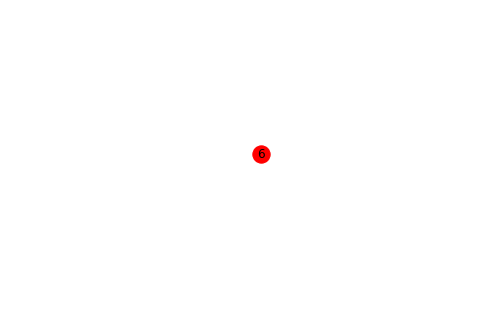

1	1
2	1000
3	3
4	1
5	1000
7	1000
8	1000
9	1000


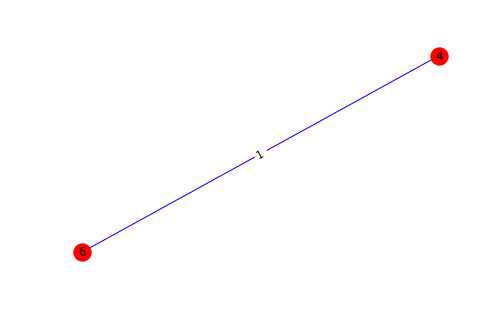

1	1
2	0.5
3	1
5	1000
7	2
8	1000
9	1000


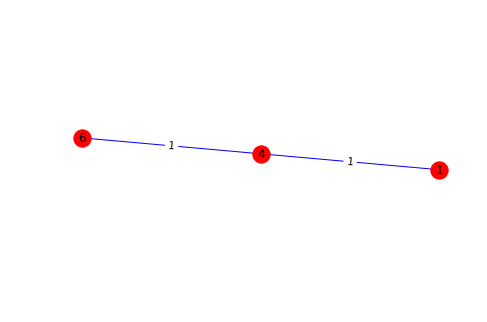

2	0.5
3	1
5	3
7	2
8	2
9	1000


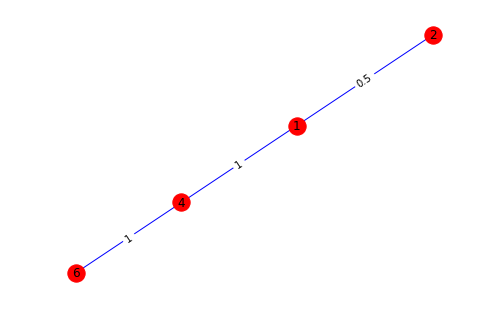

3	1
5	3
7	2
8	0.1
9	1000


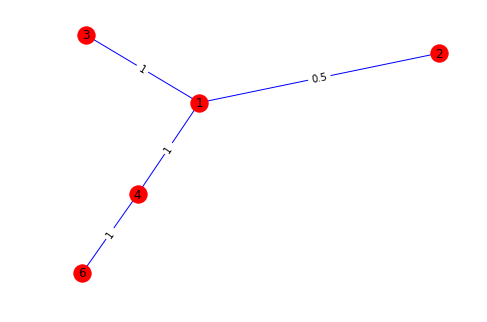

5	3
7	2
8	0.1
9	1000


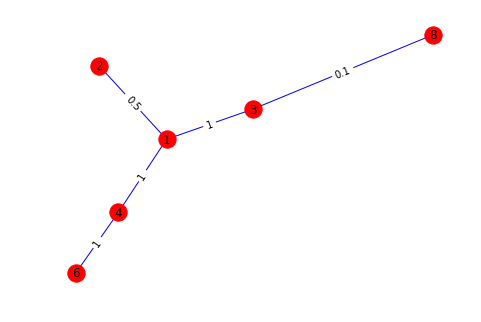

5	3
7	2
9	1000


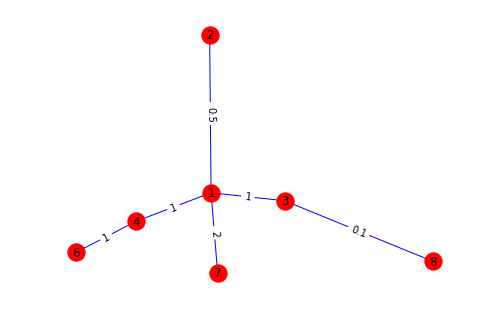

5	3
9	0.6


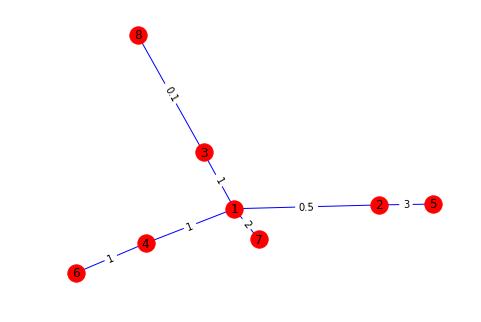

9	0.6


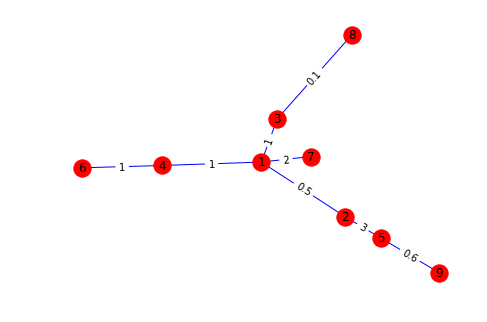

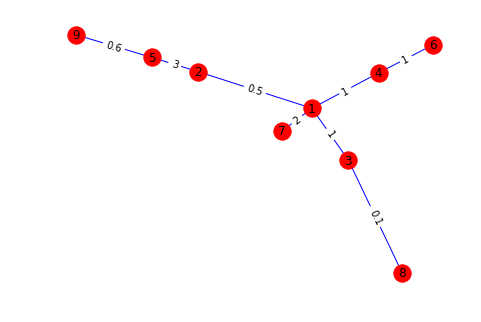

In [115]:
T = prim(G, 6, verbose=True)
display_graph(T)

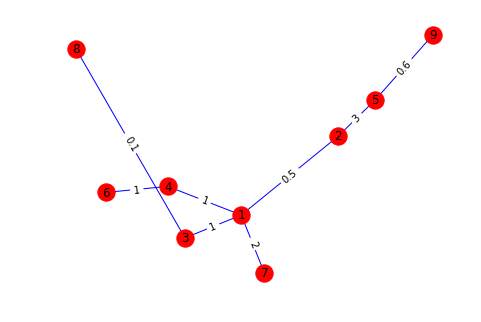

In [18]:
T = nx.minimum_spanning_tree(G)
display_graph(T)

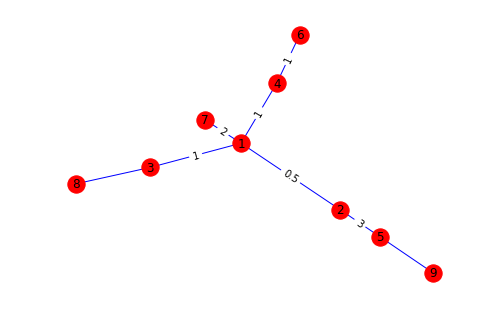

In [17]:
def insertion_sort(data):
    for i in range(1, len(data)):
        j = i
        while j > 0 and data[j][2] < data[j-1][2]:
            data[j], data[j-1] = data[j-1], data[j]
            j = j - 1

#Kruskal's Algorithm
def kruskal(G, verbose=False):
    #Create a forest from the nodes in G
    F = []
    for node in G.nodes:
        F.append(nx.Graph())
        F[-1].add_node(node)

    #Sort the edges of G
    edge_set = list(G.edges.data('weight'))
    insertion_sort(edge_set)

    #Iterate over the edges in G, in ascending weight order
    for a, b, weight in edge_set:
        a_tree = None
        b_tree = None
    
        #Determine if a and b are in the same tree (linear search)
        for t in F:
            if a in t.nodes:
                a_tree = t
                break
    
        for t in F:
            if b in t.nodes:
                b_tree = t
                break
            
        #If so, skip this edge
        if (a_tree == b_tree):
            continue
        
        #If not, merge the trees
        a_tree.add_edge(a, b, weight=weight)
        a_tree.add_edges_from(b_tree.edges)
        
        if verbose:
            display_graph(a_tree)
    
        #The b tree has been merged, so delete it from the forest
        del b_tree
        
    #Return the forest. If graph is connected,
    #then the spanning tree will be at index 0
    return F
        

T = kruskal(G)
display_graph(T[0])



[]


[(1, 2, 0.5), (1, 4, 1), (1, 7, 2), (1, 3, 1), (2, 3, 1), (2, 5, 3), (2, 8, 2), (3, 4, 3), (3, 5, 4)]
[(1, 2, 0.5), (1, 4, 1), (1, 3, 1), (2, 3, 1), (1, 7, 2), (2, 8, 2), (2, 5, 3), (3, 4, 3), (3, 5, 4)]
